   # *Hypothesis: Tiger sharks killed x% more men than women in the last 5 decades*

# - **Step 1**:   read the dataset

# - **Step 2**:   get rid of completely empty columns

# - **Step 3**:   create a new df that is clean

# - **Step 4**:   change NaN values for unknown in columns of interest

# - **Step 5**:   correct the year decimals with regex

# - **Step 6**:   dissect tiger sharks attack by year and plot by year

# - **Step 7**:   dissect tiger sharks attack by sex and plot by year

# - **Step 8**:   create a table with shark attacks by year and sex and show %

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

# - **Step 1**:   Read the dataset ✅

In [85]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv('attacks.csv', encoding='latin')
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [87]:
#title of each column and how many there are of them
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [21]:
len(df.columns)

24

In [22]:
#rename columns with spaces after the string

df2 = df.rename(columns={'Species ': 'Species', 'Sex ': 'Sex' })

# - **Step 2**:   Get rid of completely empty columns ✅

In [23]:
#number of empty cells held in each column

df2.isnull().sum().sort_values().tail()

Age            22252
Species        22259
Time           22775
Unnamed: 23    25721
Unnamed: 22    25722
dtype: int64

In [24]:
#columns with nearly all values missing are removed from the table

valid_columns = df2.isnull().sum().sort_values(ascending=False) < 25000
valid_columns.head(10)

Unnamed: 22    False
Unnamed: 23    False
Time            True
Species         True
Age             True
Sex             True
Activity        True
Location        True
Fatal (Y/N)     True
Area            True
dtype: bool

In [25]:
#valid columns added only if isValid -> True

valid_columns = [coluName for coluName,isValid in valid_columns.items() if isValid]

# - **Step 3**:   Create a new df that is clean ✅

In [26]:
#clean df made with valid_columns with no specific order

df_clean=df2[valid_columns]
df_clean.head()

,Time,Species,Age,Sex,Activity,Location,Fatal (Y/N),Area,Name,Country,...,Type,Year,href formula,pdf,href,Case Number.1,Case Number.2,Date,original order,Case Number
0,18h00,White shark,57,F,Paddling,"Oceanside, San Diego County",N,California,Julie Wolfe,USA,...,Boating,2018.0,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,25-Jun-2018,6303.0,2018.06.25
1,14h00 -15h00,NaN,11,F,Standing,"St. Simon Island, Glynn County",N,Georgia,Adyson McNeely,USA,...,Unprovoked,2018.0,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,18-Jun-2018,6302.0,2018.06.18
2,07h45,NaN,48,M,Surfing,"Habush, Oahu",N,Hawaii,John Denges,USA,...,Invalid,2018.0,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,09-Jun-2018,6301.0,2018.06.09
3,NaN,2 m shark,NaN,M,Surfing,Arrawarra Headland,N,New South Wales,male,AUSTRALIA,...,Unprovoked,2018.0,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,08-Jun-2018,6300.0,2018.06.08
4,NaN,"Tiger shark, 3m",NaN,M,Free diving,La Ticla,N,Colima,Gustavo Ramos,MEXICO,...,Provoked,2018.0,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,04-Jun-2018,6299.0,2018.06.04


# - **Step 4**:   Change NaN values for unknown in columns of interest ✅

In [27]:
#replace NaN 'Species' values with: Unknown species

df_clean['Species'] = df_clean.Species.fillna("unknown species")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
#remove all rows with unknown species and create a new table

df_clean["Species"].value_counts().head()

unknown species                                       22259
White shark                                             163
Shark involvement prior to death was not confirmed      105
Invalid                                                 102
Shark involvement not confirmed                          88
Name: Species, dtype: int64

In [29]:
#count the number of rows with unkown species in 'Species'

df_clean[df_clean["Species"]=='unknown species'].count()

Time                       1038
Species                   22259
Age                        1278
Sex                        2592
Activity                   2523
Location                   2474
Fatal (Y/N)                2815
Area                       2544
Name                       2725
Country                    2800
Injury                     2821
Investigator or Source     2830
Type                       2834
Year                       2837
href formula               2837
pdf                        2838
href                       2838
Case Number.1              2838
Case Number.2              2838
Date                       2838
original order             2845
Case Number                5238
dtype: int64

# - **Step 5**:   Remove rows with unknown species in 'Species'  ✅

In [30]:
#new df with the known shark species only

df_species = df_clean[df_clean["Species"]!='unknown species']
len(df_species)

3464

# - **Step 6**:   Correct the year decimals with regex

In [68]:
#make a list out of all years in the column "Years"

year_list = list(df_clean["Year"])

In [69]:
year_correction = []

In [70]:
#get rid of the decimal with re.findall

year_correction["Year"]=[]

for year in year_list:
    res = re.findall(r"\d{4}",year)
    if res:
        year_correction["Year"].append(res[0])
    else:
        year_correction["Year"].append('')
        
        
year_correction["Year"]

TypeError: list indices must be integers or slices, not str

In [ ]:
#create new df with corrected years

df_clean = df_clean.assign(Year=year_correction["Year"])


# - **Step 7**:   Dissect white sharks attack by year and plot by year

In [89]:
df_white_sharks = df_clean[(df_clean["Species"]== "White shark")]

In [90]:
%matplotlib inline

In [91]:
df_white_sharks[["Species","Year","Sex","Name"]]

,Species,Year,Sex,Name
0,White shark,2018.0,F,Julie Wolfe
34,White shark,2018.0,M,Ross Spowart
120,White shark,2017.0,M,Steve Lawson
155,White shark,2017.0,F,Laeticia Brouwer
169,White shark,2017.0,M,Brian Correira
...,...,...,...,...
5921,White shark,1868.0,M,male
6007,White shark,1853.0,M,Alfetto
6011,White shark,1853.0,M,Mark Dare
6162,White shark,1700.0,M,seaman


In [98]:
df_white_sharks["sigloXXI"] = pd.cut(df_white_sharks.Year,5, labels=range(2010,2020,2))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Sex
sigloXXI,
2010,1
2012,0
2014,0
2016,0
2018,139


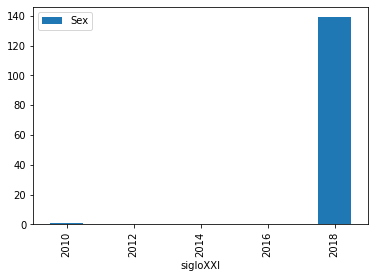

In [100]:
white_att = df_white_sharks.groupby("sigloXXI").agg({
        "Sex":"count",
})
display(white_att)
white_att.plot.bar()

In [ ]:
"""
white_att = white_sharks.groupby("Year").agg({
        "Sex":"count", 
        "cylinders":"mean"
})
display(white_att)
white_att.plot.bar()
"""


# - **Step 8**:   Dissect tiger sharks attack by sex and plot

In [102]:
df_clean[df_clean["Year"]=="2018.0"]['Sex'].count()

0

# - **Step 9**:   create a table with shark attacks by year and sex and show %